# **Modeling and Evaluating**

## Objectives

* tell whether a given cherry leaf has powdery mildew or not.

## Inputs

* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* No Comments. 



---

# Import packages

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Set Working Directory

In [30]:
cwd= os.getcwd()

In [31]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [32]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

# Set input derectories

In [33]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

# Set output directory

In [34]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


# Set Labels

In [35]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
)

Project Labels: ['healthy', 'powdery_mildew']


# Set image shape

In [36]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

---

# Number of images in train, test and validation

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


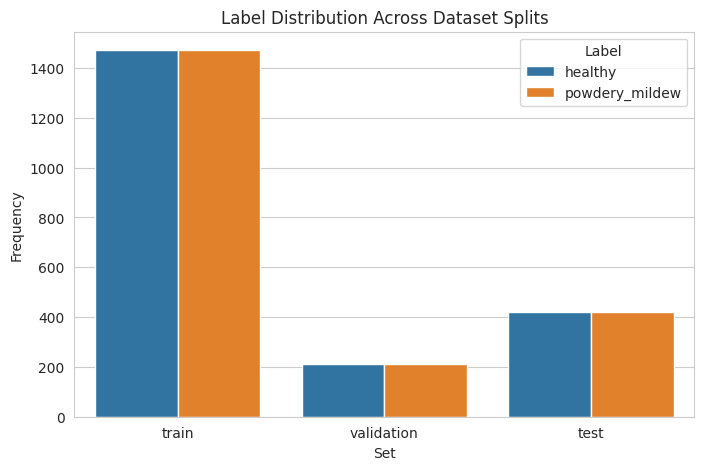

In [37]:
# Initialize an empty dictionary to store data
data = {'Set': [], 'Label': [], 'Frequency': []}

# Define the dataset splits
folders = ['train', 'validation', 'test']

# Populate the dictionary with data
for folder in folders:
    for label in labels:
        # Construct the path to the label directory
        label_dir = os.path.join(my_data_dir, folder, label)
        # Count the number of files in the label directory (handle missing directories)
        frequency = len(os.listdir(label_dir)) if os.path.exists(label_dir) else 0
        # Append data to the dictionary
        data['Set'].append(folder)
        data['Label'].append(label)
        data['Frequency'].append(frequency)
        # Print the count for each folder-label combination
        print(f"* {folder} - {label}: {frequency} images")

# Create a DataFrame from the dictionary
df_freq = pd.DataFrame(data)

# Plot the data
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.title("Label Distribution Across Dataset Splits")
plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)
plt.show()

# Image data Augmentation

Image Data Generator

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Inetialize Image Data Generator

In [39]:
augmented_image_data = ImageDataGenerator(
    # Normalization
    rescale=1.0 / 255,

    # Augmentation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,

    # Handling empty space
    fill_mode='nearest'
)

Augment training image dataset

In [40]:
# Set batch size
batch_size = 20  

# Generate augmented training data
train_set = augmented_image_data.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Display class indices
train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [41]:
validation_set = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

print(validation_set.class_indices)

Found 420 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


Augment test image dataset

In [42]:
test_set = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

print(test_set.class_indices)

Found 844 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


Plot augmented train, validation and test images

(20, 100, 100, 3)


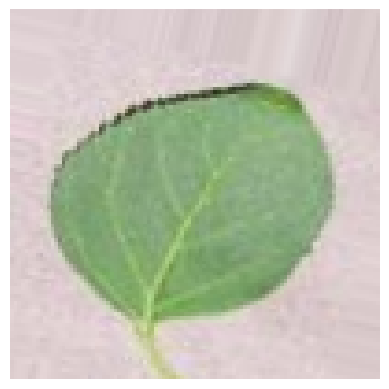

(20, 100, 100, 3)


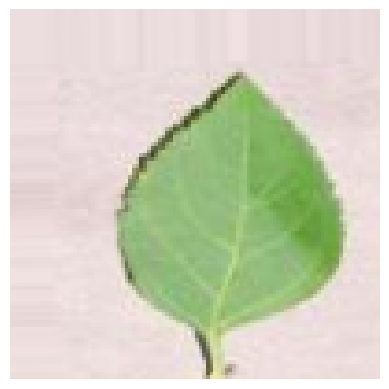

(20, 100, 100, 3)


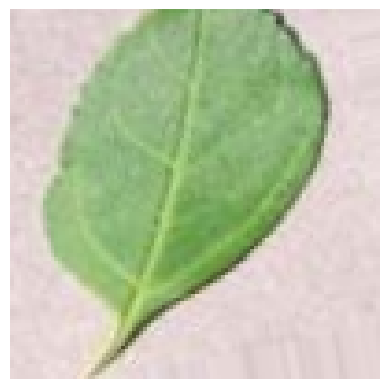

In [43]:
for _ in range(3):
    img, label = next(train_set)  # Fetch the next batch of images and labels
    print(img.shape)  # Print the shape of the image batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis("off")  # Hide the axes for a cleaner view
    plt.show()  # Show the image

(20, 100, 100, 3)


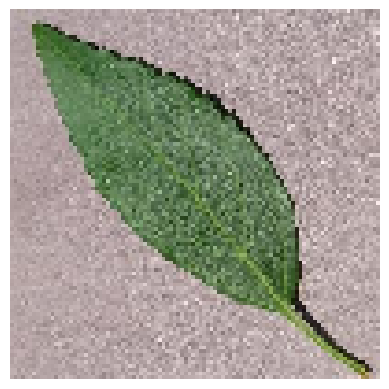

(20, 100, 100, 3)


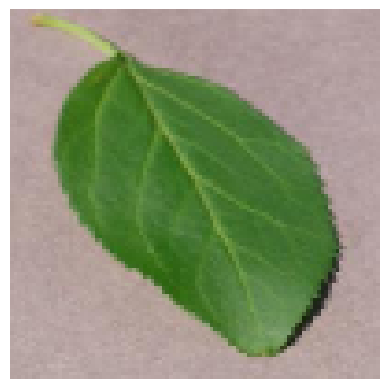

(20, 100, 100, 3)


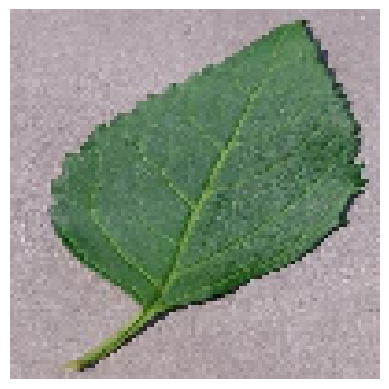

In [44]:
for _ in range(3):
    img, label = next(validation_set)  # Fetch the next batch of images and labels
    print(img.shape)  # Print the shape of the image batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis("off")  # Hide the axes for a cleaner view
    plt.show()  # Show the image

(20, 100, 100, 3)


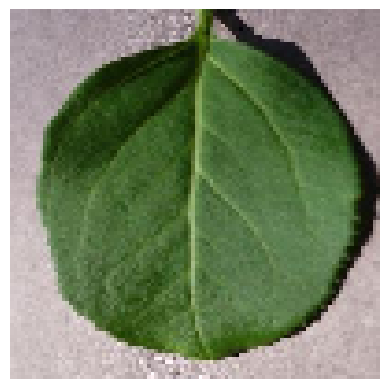

(20, 100, 100, 3)


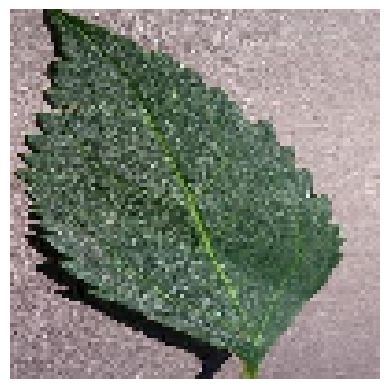

(20, 100, 100, 3)


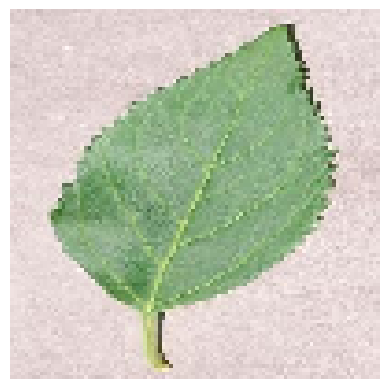

In [45]:
for _ in range(3):
    img, label = next(test_set)  # Fetch the next batch of images and labels
    print(img.shape)  # Print the shape of the image batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.axis("off")  # Hide the axes for a cleaner view
    plt.show()  # Show the image

Save class indices

In [20]:
# Save the class indices to a .pkl file
joblib.dump(value=train_set.class_indices, filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# ML Model

Import packages

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

Model

In [21]:
def create_tf_model():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
    from tensorflow.keras.callbacks import EarlyStopping

    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=image_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the Model
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # Early Stopping Callback
    early_stop = EarlyStopping(monitor='val_loss', patience=3)

    return model, early_stop


Model Summary

In [23]:
model, early_stop = create_tf_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 876,417 (3.34 MB)

 Trainable params: 876,097 (3.34 MB)

 Non-trainable params: 320 (1.25 KB)

Fit model

In [ ]:
model, early_stop = create_tf_model()

# Train the model
model.fit(
    train_set,
    epochs=25,
    steps_per_epoch=len(train_set.classes) // batch_size,
    validation_data=validation_set,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/25


/workspace/.pip-modules/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/workspace/.pip-modules/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


147/147 ━━━━━━━━━━━━━━━━━━━━ 38s 247ms/step - accuracy: 0.9361 - loss: 0.2541 - val_accuracy: 0.5000 - val_loss: 16.5105
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 26s 182ms/step - accuracy: 1.0000 - loss: 3.1443e-05

/workspace/.pip-modules/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 3.1443e-05 - val_accuracy: 0.5000 - val_loss: 17.0432
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 36s 246ms/step - accuracy: 0.9771 - loss: 0.1442 - val_accuracy: 0.5000 - val_loss: 26.7337
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0294 - val_accuracy: 0.5000 - val_loss: 27.0051


Save Model

In [48]:
model.save('outputs/v1/mildew_detector_model.h5')

---

# Model Performance

Model lerning curve

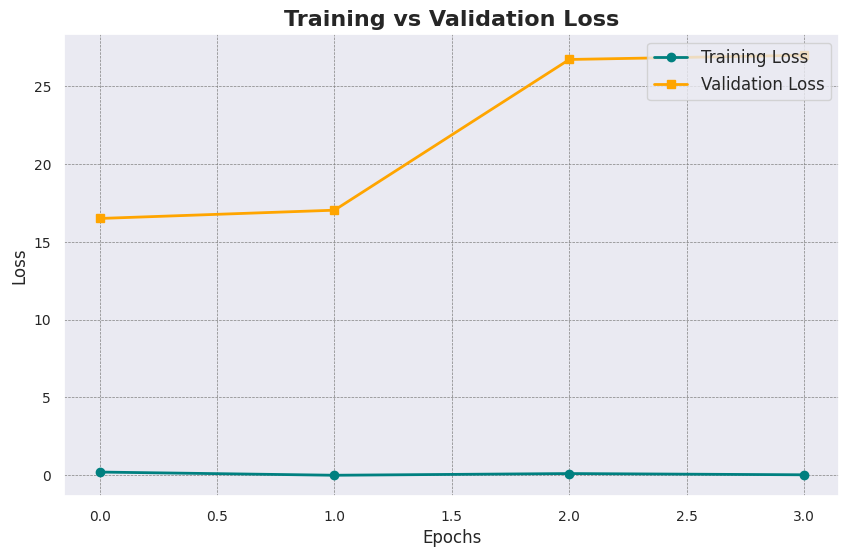

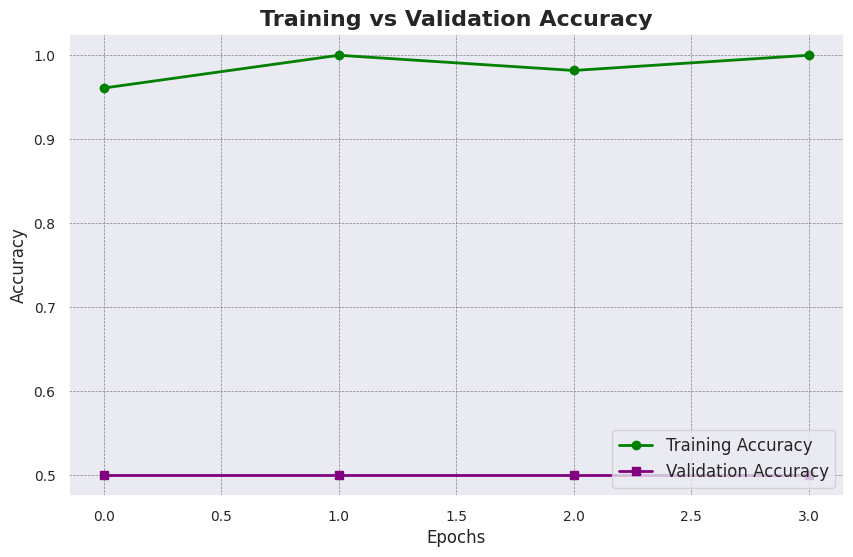

In [51]:

# Convert model history to DataFrame
losses = pd.DataFrame(model.history.history)

# Set a modern plotting style
sns.set_theme(style="darkgrid")

# Plot Loss
plt.figure(figsize=(10, 6))  # Set a larger figure size
plt.plot(losses['loss'], marker='o', color='teal', label='Training Loss', linewidth=2)
plt.plot(losses['val_loss'], marker='s', color='orange', label='Validation Loss', linewidth=2)
plt.title("Training vs Validation Loss", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 6))  # Set a larger figure size
plt.plot(losses['accuracy'], marker='o', color='green', label='Training Accuracy', linewidth=2)
plt.plot(losses['val_accuracy'], marker='s', color='purple', label='Validation Accuracy', linewidth=2)
plt.title("Training vs Validation Accuracy", fontsize=16, fontweight='bold')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()


Model evaluation

In [52]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

evaluation = model.evaluate(test_set)

/workspace/.pip-modules/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1732 - loss: 44.7258


Save Evaluation

In [53]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

# Predict on new data

Load random Image

Image shape: (100, 100), Image mode: RGB


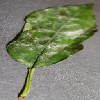

In [64]:
from tensorflow.keras.preprocessing import image

def load_image_from_directory(directory, label, index, target_size):
    # Build the file path and list the images in the label's directory
    image_files = os.listdir(os.path.join(directory, label))
    
    # Select the specific image using the provided index
    image_path = os.path.join(directory, label, image_files[index])
    
    # Load the image with the desired target size and color mode
    img = image.load_img(image_path, target_size=target_size, color_mode='rgb')
    
    return img

# Parameters
pointer = 66
label = labels[1]
test_directory = test_path
image_shape = (100, 100)

# Load the image
pil_image = load_image_from_directory(test_directory, label, pointer, image_shape)

# Output image details
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert Image to array

In [67]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 100, 100, 3)


Predict probabilities

In [68]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1.0
powdery_mildew


---